# Yahoo! FINANCEのデータを用いた可視化の演習


* ここからは米国の[Yahoo! FINANCE](https://finance.yahoo.com/)の株価データを用いて相関関係の可視化を行います。

* 今日現在までの直近1年間のtech_stockおよび日系企業の株価データを用います。
* Pythonで`Yahoo! FINANCE`のデータを集めるパッケージ`yfinance`を用います。

```{warning}
ここで用いるパッケージ[yfinance](https://github.com/ranaroussi/yfinance)はYahooが公開しているAPIを利用したオープンソースのツールであり、研究・教育目的での利用を想定しています。
ダウンロードした実際のデータを使用する権利の詳細については、ヤフーの利用規約を参照する必要があります（[Yahoo Developer API Terms of Use](https://legal.yahoo.com/us/en/yahoo/terms/product-atos/apiforydn/index.html); [Yahoo Terms of Service](https://legal.yahoo.com/us/en/yahoo/terms/otos/index.html); [Yahoo Terms](https://policies.yahoo.com/us/en/yahoo/terms/index.htm)）。
```

* ここで紹介する企業以外を試す場合は、[Yahoo! FINANCE](https://finance.yahoo.com/)のページで企業の銘柄コードを確認して置き換えてください。


```{warning}


必要なパッケージをインストールします。すでに、`requirements.txt`を用いてパッケージ類をインストールしている場合は、そのまま次のセルに進んでください。

まだの場合は、<a href="/docs/sec01/02_howtopip.html">こちらのページ</a>を用いてパッケージ類をインストールしてください。もしくは、以下の方法をお試しください。

   1. WinodwsのかたはWindowsのメニューから`Anaconda Propmt`を、Macの方は`Terminal`を起動させ、
      
   2. `conda install git` を入力してエンターを押してください。しばらくすると`Proceed ([y]/n)? `と表示されるので`y`を入力してエンターを押して続行してください。

   3. `pip install git+https://github.com/pydata/pandas-datareader`を入力しエンターを押して、`pandas-datareader`のインストールを実行します。
      
   3. Terminal上で、`pip install yfinance --upgrade --no-cache-dir` を入力しエンターを押して`yfinance`のインストールを実行します。

```

In [1]:
from datetime import datetime
import os
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [2]:

end = datetime.now()
start =  datetime(end.year-1, end.month, end.day)

yf.pdr_override()

tech_stock = ['GOOG', 'AAPL', 'META', 'AMZN', 'NFLX', 'TSLA'] 

for company in tech_stock:
    globals()[company] = pdr.get_data_yahoo(tickers=company, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open：始値<br>
High：高値<br>
Low：安値<br>
Close：終値<br>
Volume：出来高（1日に取引が成立した株の数）<br>
Adj Close：[調整後終値](https://help.yahoo.com/kb/SLN28256.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABm20bVaadJmuWaLtnp6QzQCwpE_bTPY1hTdDmAaCgQpJZbpvmWaMHqlWYEgnwyh3FfOHJwtu91jk5ZEOSLevJYuUan19QpMb53UoUn5gZQ845yQPdjRWlMdlhsKSZKhCHWJd_hKiDjztsd_0rJdtzmiGUb3XIbM17AScHCeUs8B)

In [3]:
GOOG.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   135.732774  137.240460  134.536206  135.915377  135.915377   
std     12.130934   12.137559   12.024560   12.087202   12.087202   
min    105.320000  106.300003  104.500000  105.209999  105.209999   
25%    127.781248  129.477501  126.059998  127.825003  127.825003   
50%    135.654999  137.332497  134.745003  136.235001  136.235001   
75%    142.687500  143.896255  141.218754  142.597500  142.597500   
max    175.990005  176.419998  171.399994  173.690002  173.690002   

             Volume  
count  2.520000e+02  
mean   2.311400e+07  
std    8.658469e+06  
min    8.828600e+06  
25%    1.770952e+07  
50%    2.069170e+07  
75%    2.505195e+07  
max    5.879610e+07

In [4]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-05-02 to 2024-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


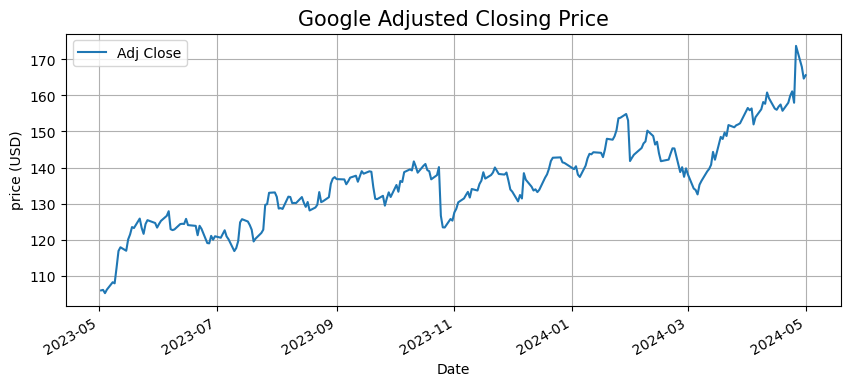

In [5]:
# Google の調整済終値のプロット
GOOG['Adj Close'].plot(legend=True, figsize=(10,4))
plt.title("Google Adjusted Closing Price", fontsize=15)
plt.ylabel('price (USD)')
plt.grid()
plt.show()

## 移動平均（Moving Average）

時系列データで一定区間ごとの平均値を区間をずらしながら求めたもの

In [6]:
ma_day = [10, 20, 30] # 10日、20日、50日の移動平均の値を持つ新しいcolumn(MA_10, MA_20, MA_50)を作ります
for ma in ma_day:
    for company in [GOOG, AAPL, META, NFLX, AMZN]:
        company['MA_{}'.format(ma)] = company['Adj Close'].rolling(ma).mean() #rolling(日数).mean()で日数の移動平均を求めます

In [7]:
AAPL.head(3)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-02  170.089996  170.350006  167.539993  168.539993  167.645157   
2023-05-03  169.500000  170.919998  167.160004  167.449997  166.560959   
2023-05-04  164.889999  167.039993  164.309998  165.789993  164.909760   

              Volume  MA_10  MA_20  MA_30  
Date                                       
2023-05-02  48425700    NaN    NaN    NaN  
2023-05-03  65136000    NaN    NaN    NaN  
2023-05-04  81235400    NaN    NaN    NaN

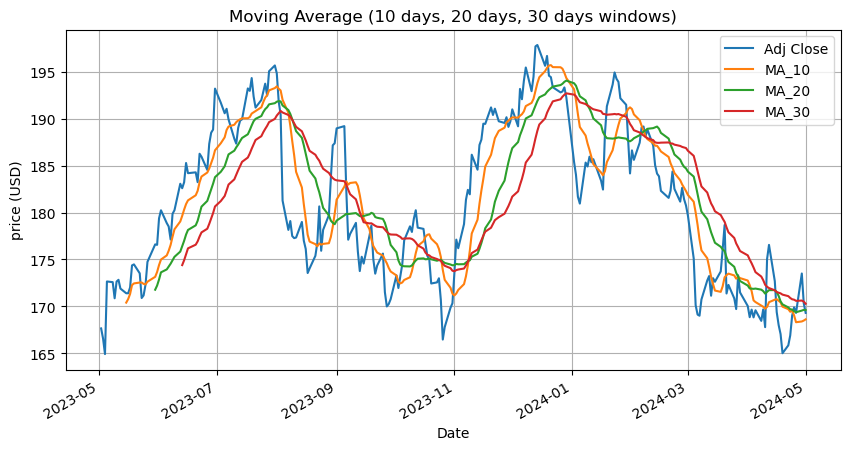

In [8]:
AAPL[['Adj Close','MA_10', 'MA_20','MA_30']].plot(subplots=False, figsize=(10,5))
plt.title('Moving Average (10 days, 20 days, 30 days windows)')
plt.ylabel('price (USD)')
plt.grid()
plt.show()

## 参考: 株価の前日からのパーセント変化を求めます

In [9]:
for company in [GOOG, AAPL, META, AMZN, NFLX,TSLA]:
    company['returns'] = company['Adj Close'].pct_change()

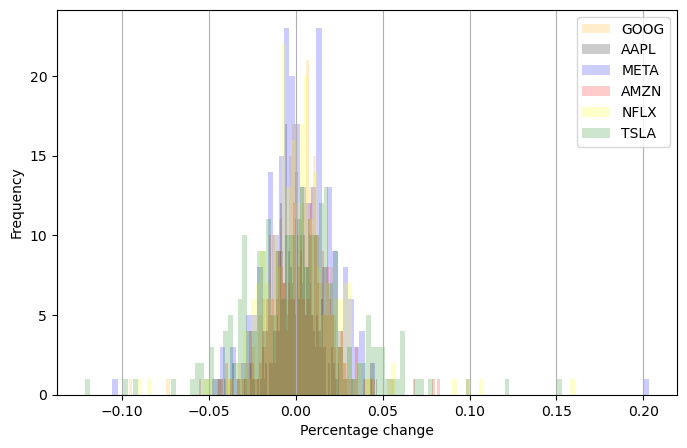

In [10]:
colors = ['orange','black','blue','red','yellow','green']
i=0
plt.figure(figsize=(8,5))
for company in [GOOG, AAPL, META, AMZN, NFLX, TSLA]:
    plt.hist(company['returns'].dropna(),bins=100,color=colors[i],alpha = 0.2, label=tech_stock[i])
    i += 1
plt.legend()
plt.xlabel('Percentage change')
plt.ylabel('Frequency')
plt.grid(axis='x')
plt.show()

ヒストグラムで6社の変化率を上のように示すと、6社とも多くの日で前日からの変化率は??％以内。

6社の終値を格納したDataFrameを作成します

In [11]:
tech_stock_close = pd.DataFrame({'GOOG':GOOG['Adj Close'],
                           'AAPL':AAPL['Adj Close'],
                           'META': META['Adj Close'],
                           'AMZN': AMZN['Adj Close'],
                           'NFLX': NFLX['Adj Close'],
                           'TSLA': TSLA['Adj Close']})
tech_stock_close.describe()

GOOG        AAPL        META        AMZN        NFLX        TSLA
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000
mean   135.915377  180.870812  352.497566  145.376151  470.157342  221.334127
std     12.087202    8.623236   84.354595   21.235608   85.110898   36.876638
min    105.209999  164.909760  232.533279  103.629997  317.549988  142.050003
25%    127.825003  173.282684  295.943520  129.099995  411.580002  187.507500
50%    136.235001  180.048981  318.372208  140.585007  444.944992  232.120003
75%    142.597500  188.879902  399.875725  159.774998  555.059982  252.699993
max    173.690002  197.857529  527.340027  189.050003  636.179993  293.339996

In [12]:
tech_stock_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-05-02 to 2024-05-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    252 non-null    float64
 1   AAPL    252 non-null    float64
 2   META    252 non-null    float64
 3   AMZN    252 non-null    float64
 4   NFLX    252 non-null    float64
 5   TSLA    252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


### GoogleとApple
GoogleとApple の直近1年間の株価終値の相関係数を求めます。

In [13]:
tech_stock_close['GOOG'].corr(tech_stock_close['AAPL'])

-0.10557248377995396

GoogleとApple の直近1年間の株価終値の相関行列を示します。

In [14]:
tech_stock_close[['GOOG','AAPL']].corr()

GOOG      AAPL
GOOG  1.000000 -0.105572
AAPL -0.105572  1.000000

GoogleとApple の直近1年間の株価終値の散布図を示します。

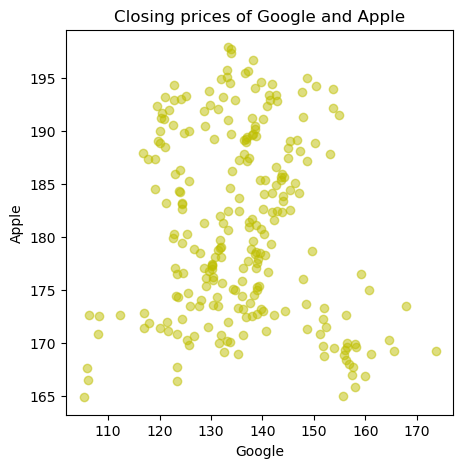

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(tech_stock_close['GOOG'],tech_stock_close['AAPL'],color ='y',alpha=0.5)
plt.xlabel('Google')
plt.ylabel('Apple')
plt.title("Closing prices of Google and Apple")
plt.show()

### ヒストグラムと散布図を１つの図中に示す方法

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


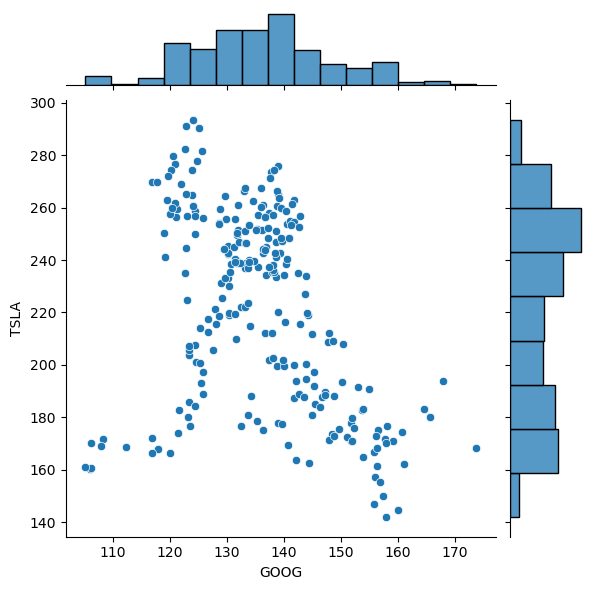

In [16]:
import seaborn as sns

sns.jointplot(data=tech_stock_close, x='GOOG', y='TSLA')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

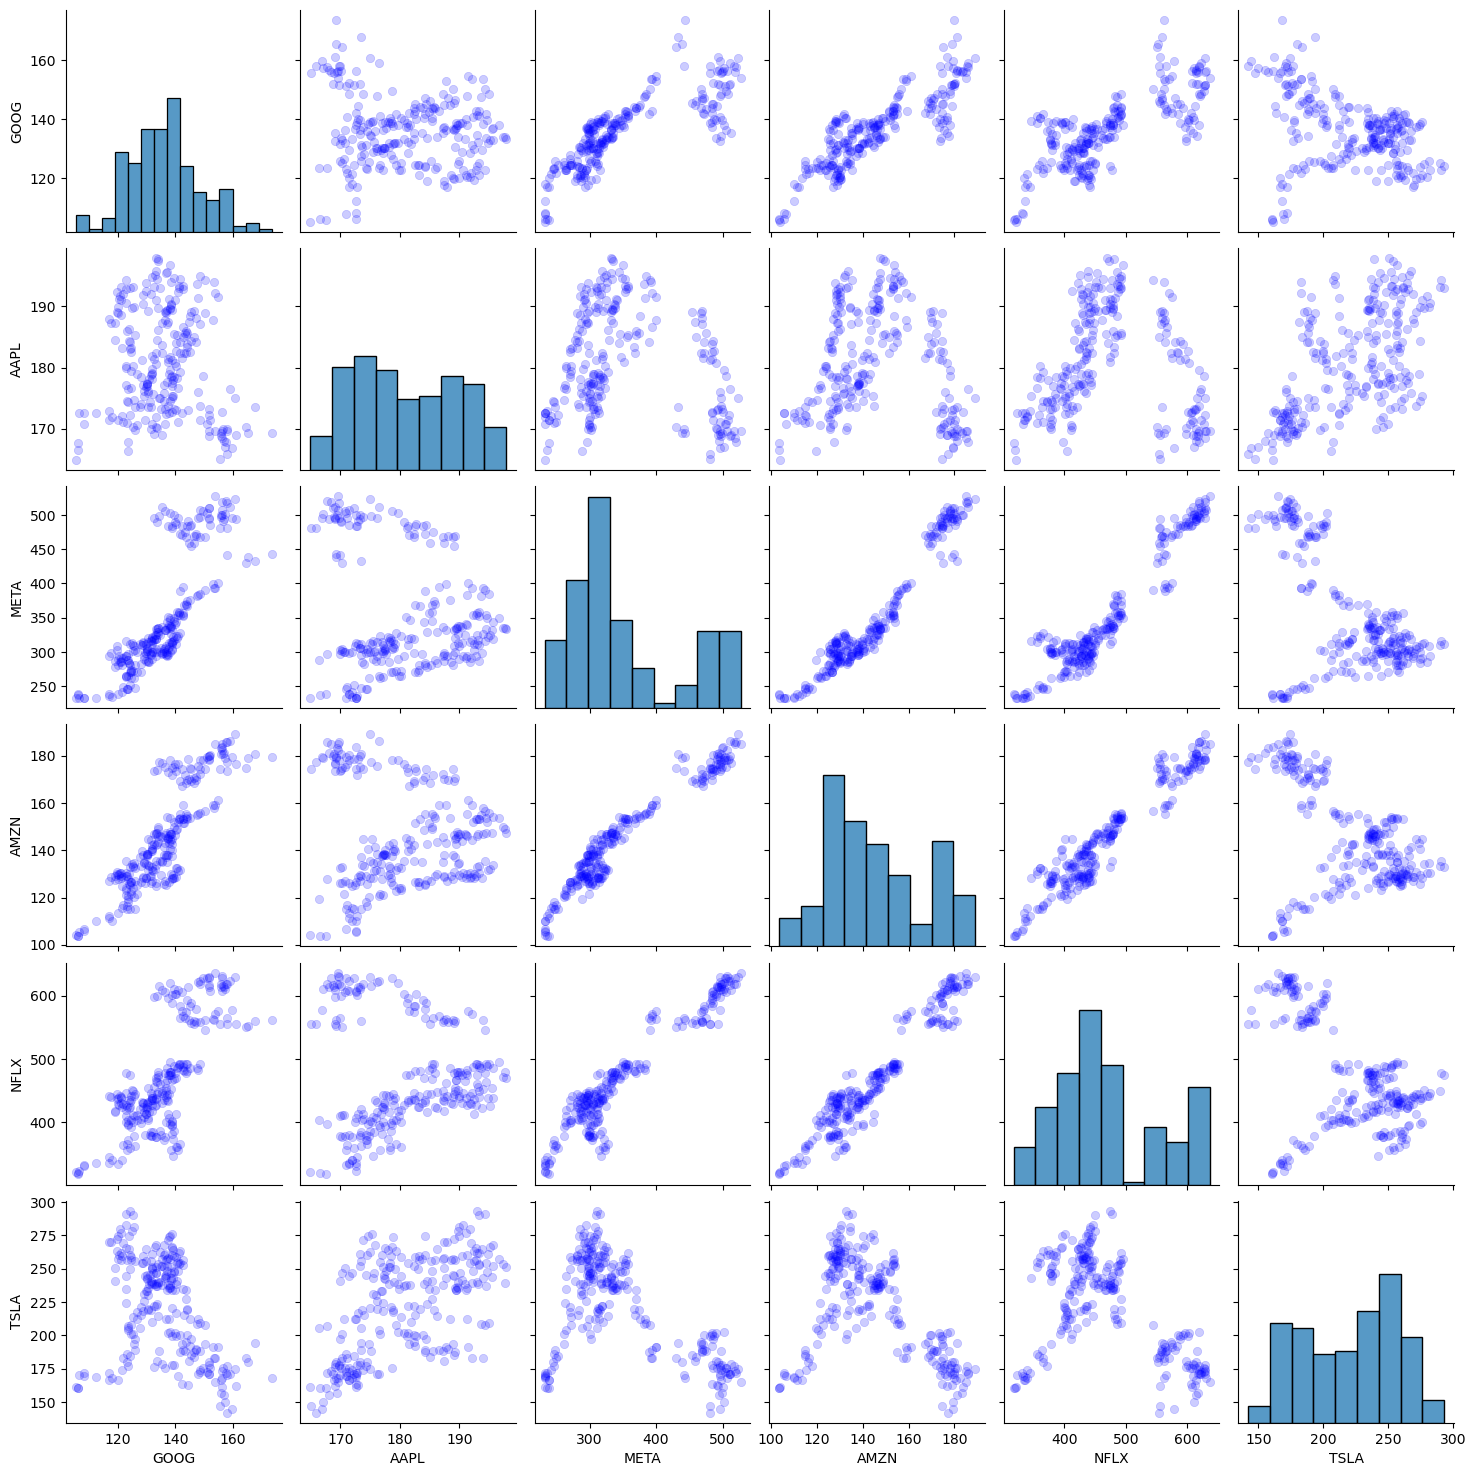

In [17]:
sns.pairplot(tech_stock_close, plot_kws=dict(color = 'b', edgecolor='b', alpha = 0.2))
plt.show()

6社の相関行列を示します。

In [18]:
tech_stock_close.corr()

GOOG      AAPL      META      AMZN      NFLX      TSLA
GOOG  1.000000 -0.105572  0.800213  0.855755  0.751844 -0.383481
AAPL -0.105572  1.000000 -0.177844 -0.075834 -0.021603  0.588247
META  0.800213 -0.177844  1.000000  0.966761  0.953083 -0.567304
AMZN  0.855755 -0.075834  0.966761  1.000000  0.959860 -0.482748
NFLX  0.751844 -0.021603  0.953083  0.959860  1.000000 -0.493303
TSLA -0.383481  0.588247 -0.567304 -0.482748 -0.493303  1.000000

#### 参考

続いて日本の自動車メーカーのToyota Motor CorporationとHonda Motor Co., Ltd.の直近1年の株価も収集します。

In [19]:
end = datetime.now()
start =  datetime(end.year-1, end.month, end.day)

yf.pdr_override()

vehicles = ['TM', 'HMC'] # TM : Toyota Motor Corporation, HMC: Honda Motor Co., Ltd.
for company in vehicles:
    globals()[company] = pdr.get_data_yahoo(tickers=company, start=start, end=end) 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [20]:
print(TM.info(), HMC.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-05-02 to 2024-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-05-02 to 2024-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None None


In [21]:
tm_hmc = pd.DataFrame({'TM':TM['Adj Close'],'HMC':HMC['Adj Close']})
tech_stock_th = pd.concat([tech_stock_close, tm_hmc], axis=1)

In [22]:
tech_stock_th.sample(4)

GOOG        AAPL        META        AMZN        NFLX  \
Date                                                                     
2024-03-07  135.240005  169.000000  512.190002  176.820007  608.510010   
2023-09-06  135.369995  182.436539  298.852936  135.360001  445.760010   
2023-12-27  141.440002  192.903839  357.450714  153.339996  491.790009   
2023-06-05  126.629997  178.873627  271.102356  125.300003  403.540009   

                  TSLA          TM        HMC  
Date                                           
2024-03-07  178.649994  247.940002  35.439999  
2023-09-06  251.919998  178.830002  33.430000  
2023-12-27  261.440002  180.720001  30.510000  
2023-06-05  217.610001  145.729996  29.830000

In [23]:
# データを保存
os.makedirs('./data', exist_ok=True)
tech_stock_close.to_csv('./data/tech_stock_close.csv')
tech_stock_close.to_pickle('./data/tech_stock_close.pkl')

tech_stock４社と自動車メーカー２社の相関行列を示します。

In [24]:
tech_stock_th.corr()

GOOG      AAPL      META      AMZN      NFLX      TSLA        TM  \
GOOG  1.000000 -0.105572  0.800213  0.855755  0.751844 -0.383481  0.814887   
AAPL -0.105572  1.000000 -0.177844 -0.075834 -0.021603  0.588247 -0.200791   
META  0.800213 -0.177844  1.000000  0.966761  0.953083 -0.567304  0.965704   
AMZN  0.855755 -0.075834  0.966761  1.000000  0.959860 -0.482748  0.953617   
NFLX  0.751844 -0.021603  0.953083  0.959860  1.000000 -0.493303  0.911922   
TSLA -0.383481  0.588247 -0.567304 -0.482748 -0.493303  1.000000 -0.506674   
TM    0.814887 -0.200791  0.965704  0.953617  0.911922 -0.506674  1.000000   
HMC   0.740603 -0.276948  0.803598  0.775822  0.719604 -0.261385  0.872883   

           HMC  
GOOG  0.740603  
AAPL -0.276948  
META  0.803598  
AMZN  0.775822  
NFLX  0.719604  
TSLA -0.261385  
TM    0.872883  
HMC   1.000000

### 参考: ヒートマップで相関関係を示す

変数が多い場合視覚的にわかりやすい

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


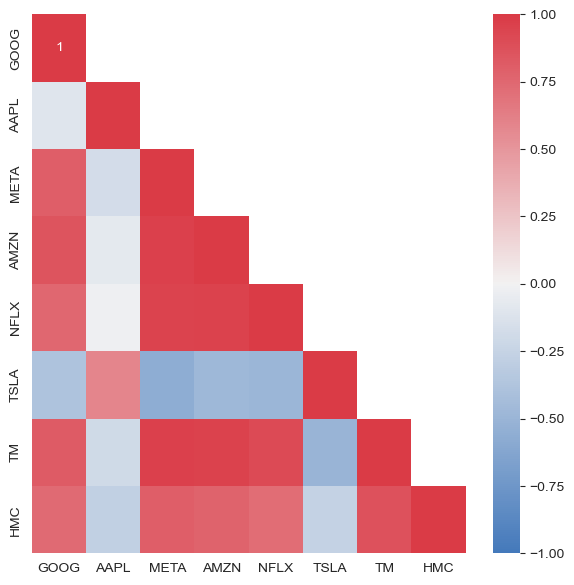

In [25]:
def CorrMtx(df, dropDuplicates = True):

    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask,1)] = True

    sns.set_style(style = 'white')

    fig, ax = plt.subplots(figsize=(7, 7))

    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    if dropDuplicates:
        sns.heatmap(df, mask=mask, vmin=-1, vmax=1,annot=True,cmap=cmap)
    else:
        sns.heatmap(df, vmin=-1, vmax=1,annot=True,cmap=cmap)


CorrMtx(tech_stock_th.corr(), dropDuplicates = True)

AppleとToyotaの散布図を示します。

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


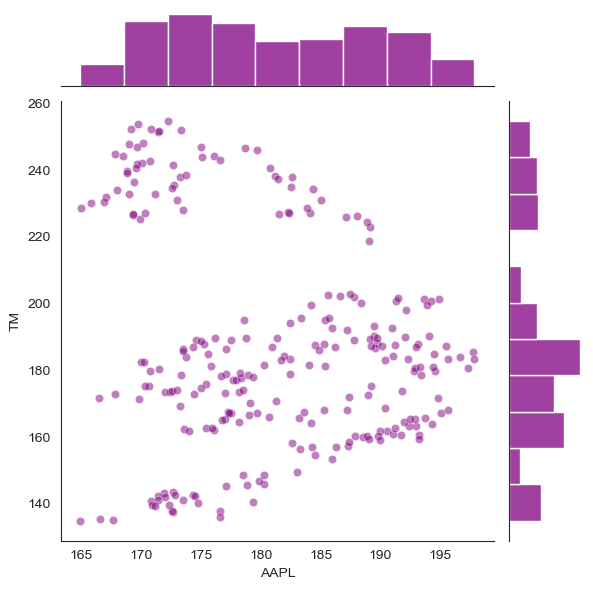

In [26]:
sns.jointplot(x='AAPL', y='TM', data=tech_stock_th, color="purple", alpha = 0.5)
plt.show()

HondaとToyotaの散布図を示します。

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


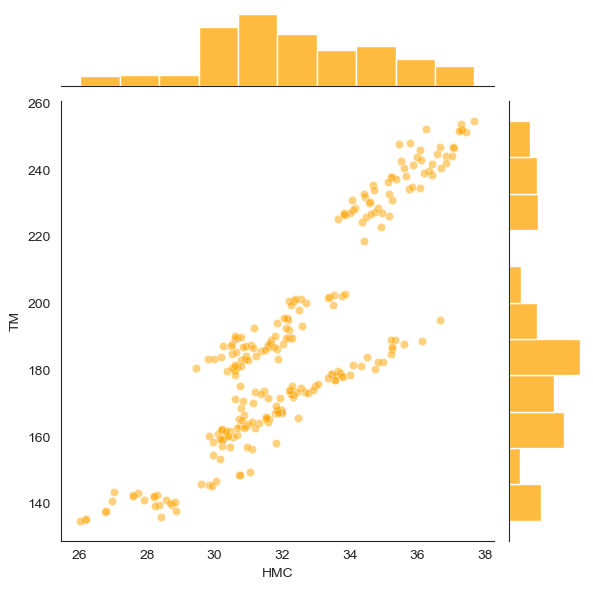

In [27]:
sns.jointplot(x='HMC', y='TM', data=tech_stock_th, color="orange", alpha = 0.5)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

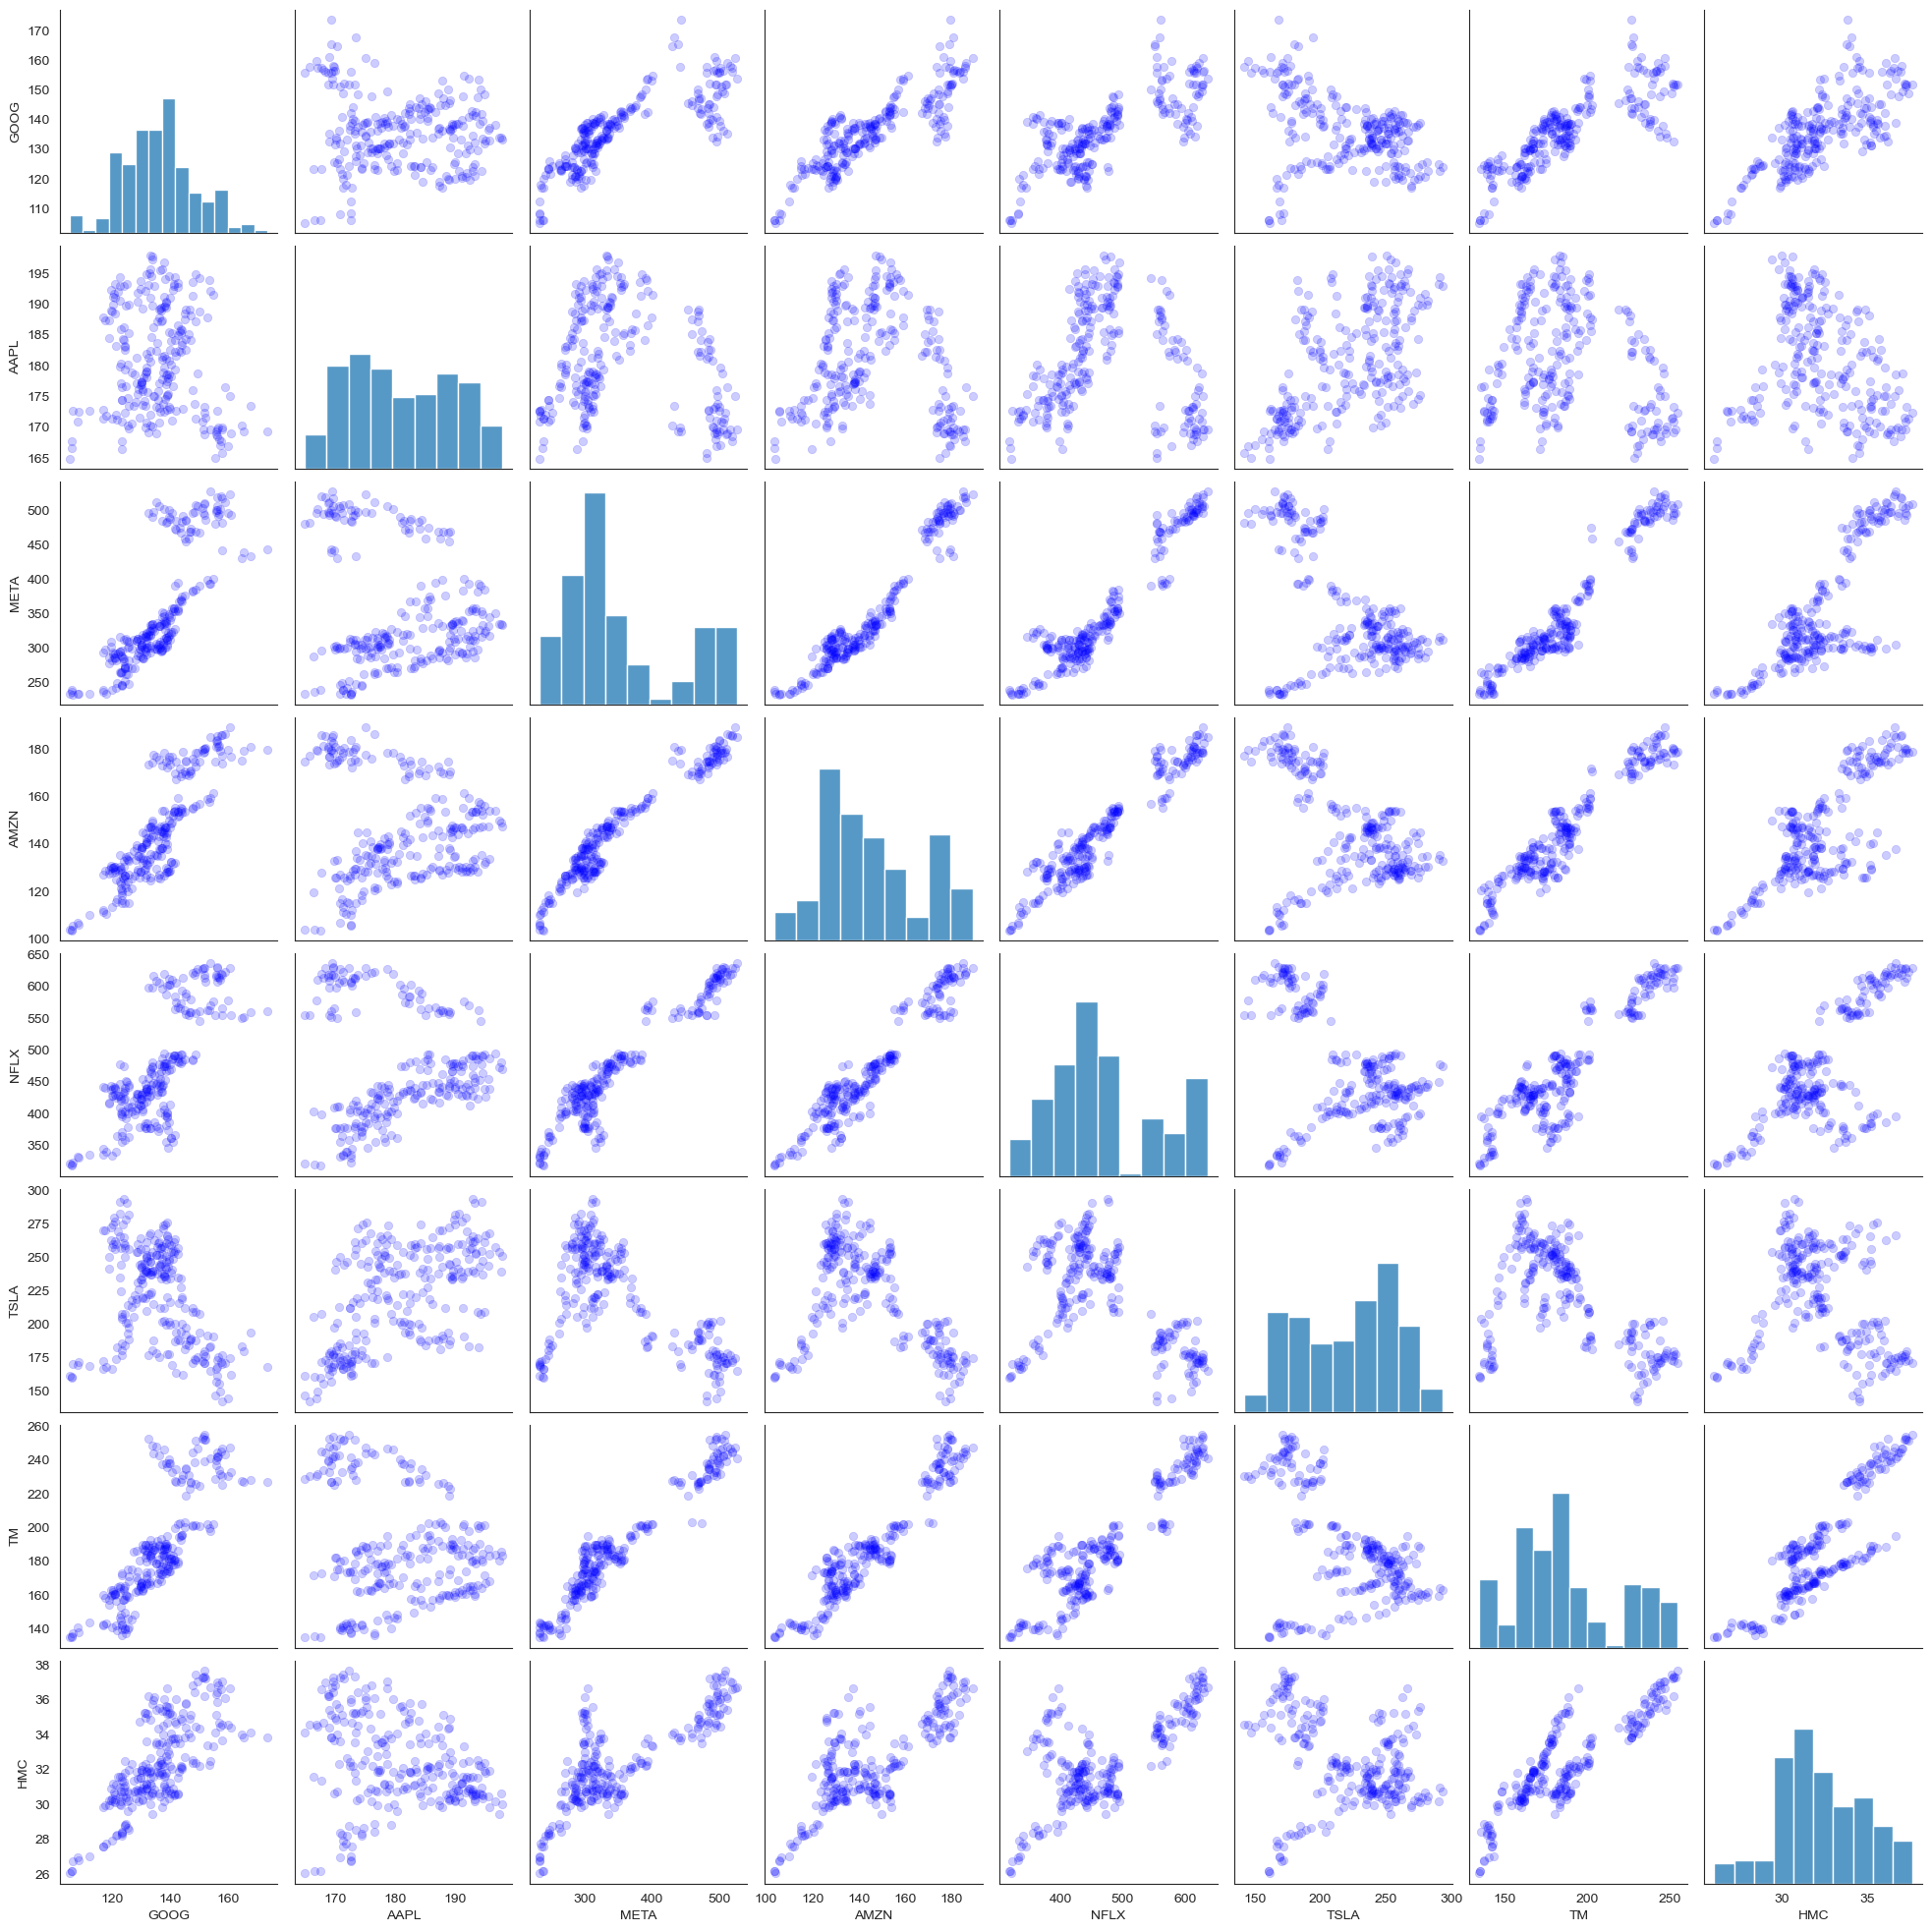

In [28]:
sns.pairplot(tech_stock_th, plot_kws=dict(color = 'blue', edgecolor='b', alpha = 0.2))
plt.show()

### 参考：ロウソクチャートを描く

```{note}
以下`cufflinks`というパッケージを用いて可視化を行います。
`requirements.txt`を用いて必要なパッケージをすでにインストールしている場合は、次のセルに進んでください。インストール方法はこちら{doc}`/docs/sec01/02_howtopip`をご確認ください。

まだの場合などは、`pip install cufflinks`をターミナルで実行しcufflinksをインストールてから次のセルを実行してください。
```

In [29]:
import cufflinks as cf
cf.set_config_file(offline=True)

qf = cf.QuantFig(AAPL, legend='top', title = 'Apple Candle Chart')
qf.iplot()

In [30]:
qf = cf.QuantFig(AAPL, legend='top', title = 'Apple Candle Chart')
qf.add_volume()  # 出来高もプロット
qf.add_sma([10,50],width=2, color=['red', 'green'])  # 移動平均線もプロット
qf.iplot()

/opt/anaconda3/lib/python3.11/site-packages/cufflinks/quant_figure.py:1061: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

